First, we will load in some libraries to help us code. 

In [189]:
library(tidyverse)
library(repr)
library(tidymodels)

Then, we will load in our data from our GitHub repository. We only need to read in the players.csv dataset, since the sessions.csv dataset is unnecessary in answering our question. We will also use the head() and tail() functions to give us an idea of what our dataset looks like. 

In [190]:
# load data 
players_data <- read.csv("https://raw.githubusercontent.com/ashleyy6/DSCI-100-Plaicraft-Project/refs/heads/main/players.csv")
head(players_data)
tail(players_data)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
191,Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
192,Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
193,Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
194,Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
195,Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
196,Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Next, we will perform some minimal tidying, just to select the columns that we need for our analysis, as well as filtering out any rows where one of the variables is missing an observation. 

In [191]:
## wrangle/clean data to the format necessary for planned analysis 

players_clean <- players_data |> 
    mutate(age = Age, subscribe = as_factor(subscribe)) |>       
    select(subscribe, played_hours, age) |>  
    filter(!is.na(subscribe), !is.na(played_hours), !is.na(age))  

head(players_clean)
tail(players_clean)

,subscribe,played_hours,age
,<fct>,<dbl>,<int>
1,TRUE,30.3,9
2,TRUE,3.8,17
3,FALSE,0.0,17
4,TRUE,0.7,21
5,TRUE,0.1,21
6,TRUE,0.0,17


,subscribe,played_hours,age
,<fct>,<dbl>,<int>
189,FALSE,0.0,17
190,TRUE,0.0,20
191,TRUE,0.0,17
192,FALSE,0.3,22
193,FALSE,0.0,57
194,FALSE,2.3,17


Next, we will create a scatterplot of the played hours vs age of the players, with the points colored by whether the player is subscribed or not. This will give us a first look at our data before we get into the analysis. 

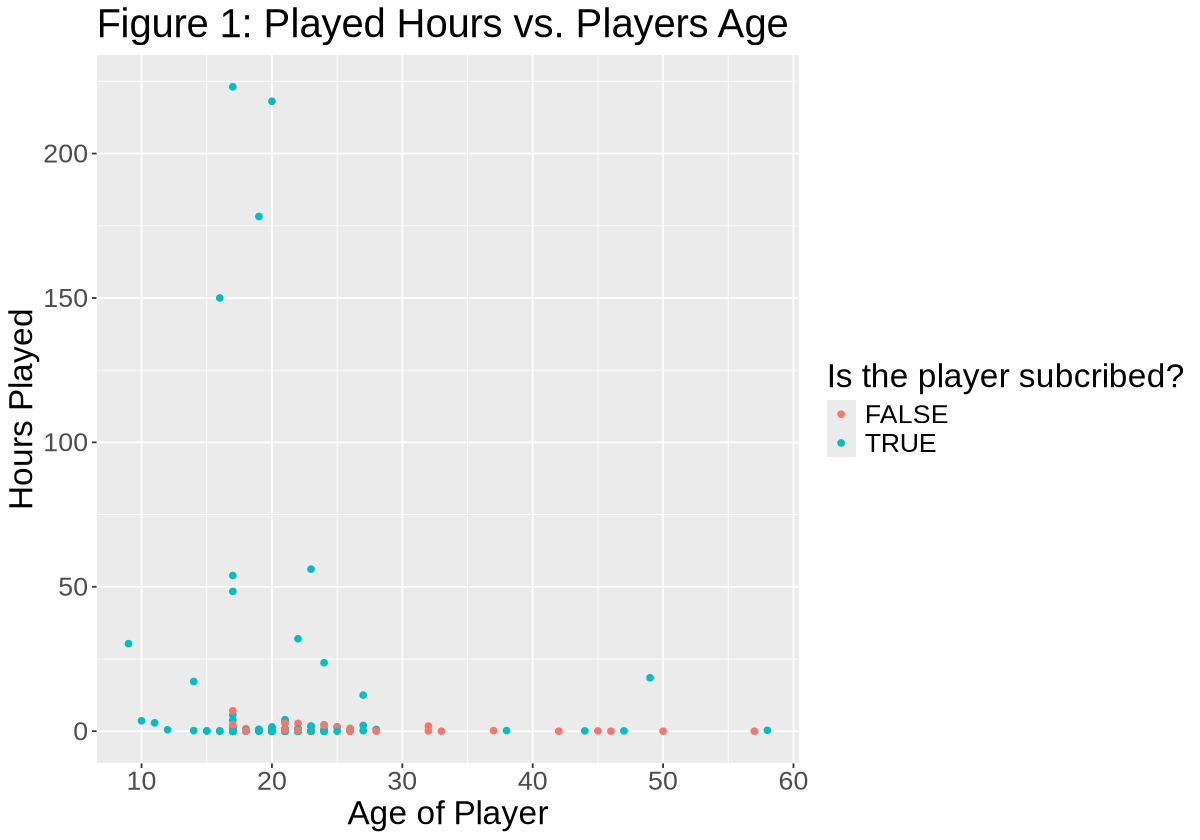

In [210]:
# primary/exploratory visualization 

options(repr.plot.width = 10, repr.plot.height = 7)

basic_players_plot <- ggplot(players_clean, aes(x = age, y = played_hours, color = subscribe)) + 
    geom_point() + 
    labs(x = "Age of Player", y = "Hours Played", color = "Is the player subcribed?") + 
    ggtitle("Figure 1: Played Hours vs. Players Age") + 
    theme(text = element_text(size = 20))
basic_players_plot

From the graph above, there's no obvious correlation between the age of the player and the hours played, nor do they seem to predict whether a person will be subscribed or not. However, in order to find the true answer, we should create a classification model in order to see if subscription values can be predicted from these two variables. 

Before we do that, let's take a look at how many people are subscribed vs not, and take a look at some summary statistics. 

In [211]:
# see how many people are subbed vs not 
players_proportions <- players_clean |> 
    group_by(subscribe) |>
    summarize(count = n(),
              percentage = n() / nrow(players_clean) * 100)
players_proportions

# see an overview of all players 
overall_summary <- players_clean |>
  summarize(
    n_players    = n(),
    mean_age     = round(mean(age), 2),
    sd_age       = round(sd(age), 2),
    mean_hours   = round(mean(played_hours), 2),
    sd_hours     = round(sd(played_hours), 2)
    )
overall_summary

# see the same overview as above, but separated by whether they are subscribed or not
by_sub_summary <- players_clean |>
  group_by(subscribe) |>
  summarize(
    n_players  = n(),
    mean_age   = round(mean(age), 2),
    sd_age     = round(sd(age), 2),
    mean_hours = round(mean(played_hours), 2),
    sd_hours   = round(sd(played_hours), 2)
    )
by_sub_summary

subscribe,count,percentage
<fct>,<int>,<dbl>
FALSE,52,26.80412
TRUE,142,73.19588


n_players,mean_age,sd_age,mean_hours,sd_hours
<int>,<dbl>,<dbl>,<dbl>,<dbl>
194,21.14,7.39,5.9,28.5


subscribe,n_players,mean_age,sd_age,mean_hours,sd_hours
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,52,23.75,9.38,0.50,1.19
TRUE,142,20.18,6.28,7.88,33.11


From these summary statistics, we can see that around 27% of our dataset consists of people who are subscribed, and the other 73% consists of people who are not. We can also see the average age and hours played of all players, as well as those of the players who are subscribed and who are not. From these summary statistics, we can gather that while there is a significant difference in play time between players who are subscribed and those who are not, there does not appear to be a significant difference in age between players who are subscribed and who are not. This will give us the idea that we may end up finding no relationship between a player's age and their play time to gauge whether they will have a subscription or not. However, we will continue to perform more analysis to see if we can find a way to accurately predict subscription based on age and play time. 

We will create a knn-classification model to see if we can predict if a player has a subscription. First, we must split the data. 

In [212]:
set.seed(2020)

players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

In [213]:
split_proportions <- players_train |> 
    group_by(subscribe) |>
    summarize(count = n(),
              percentage = n() / nrow(players_train) * 100)
split_proportions
players_proportions

subscribe,count,percentage
<fct>,<int>,<dbl>
FALSE,39,26.89655
TRUE,106,73.10345


subscribe,count,percentage
<fct>,<int>,<dbl>
FALSE,52,26.80412
TRUE,142,73.19588


We can see that the proportions of the actual data and the training data are very similar, which means that our model will be trained on data that reflects the real/full dataset. 

Next, we will create our recipe and tune our model to figure out what k-value works best for our data. 

In [214]:
players_recipe <- recipe(subscribe ~ age + played_hours, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
players_recipe

players_vfold <- vfold_cv(players_train, v = 10, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 2))

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_results <- workflow() |>
      add_recipe(players_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = players_vfold, grid = k_vals) |>
      collect_metrics()
head(knn_results)



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5109890,10,0.04312959,Preprocessor1_Model01
1,roc_auc,binary,0.5170455,10,0.04782368,Preprocessor1_Model01
3,accuracy,binary,0.5582051,10,0.04711130,Preprocessor1_Model02
3,roc_auc,binary,0.5776894,10,0.06356870,Preprocessor1_Model02
5,accuracy,binary,0.6165201,10,0.04629029,Preprocessor1_Model03
5,roc_auc,binary,0.5753030,10,0.06723427,Preprocessor1_Model03


From here, we will find and compare the accuracies of our different k values in order to determine which k value works best for our model. 

[1] 15

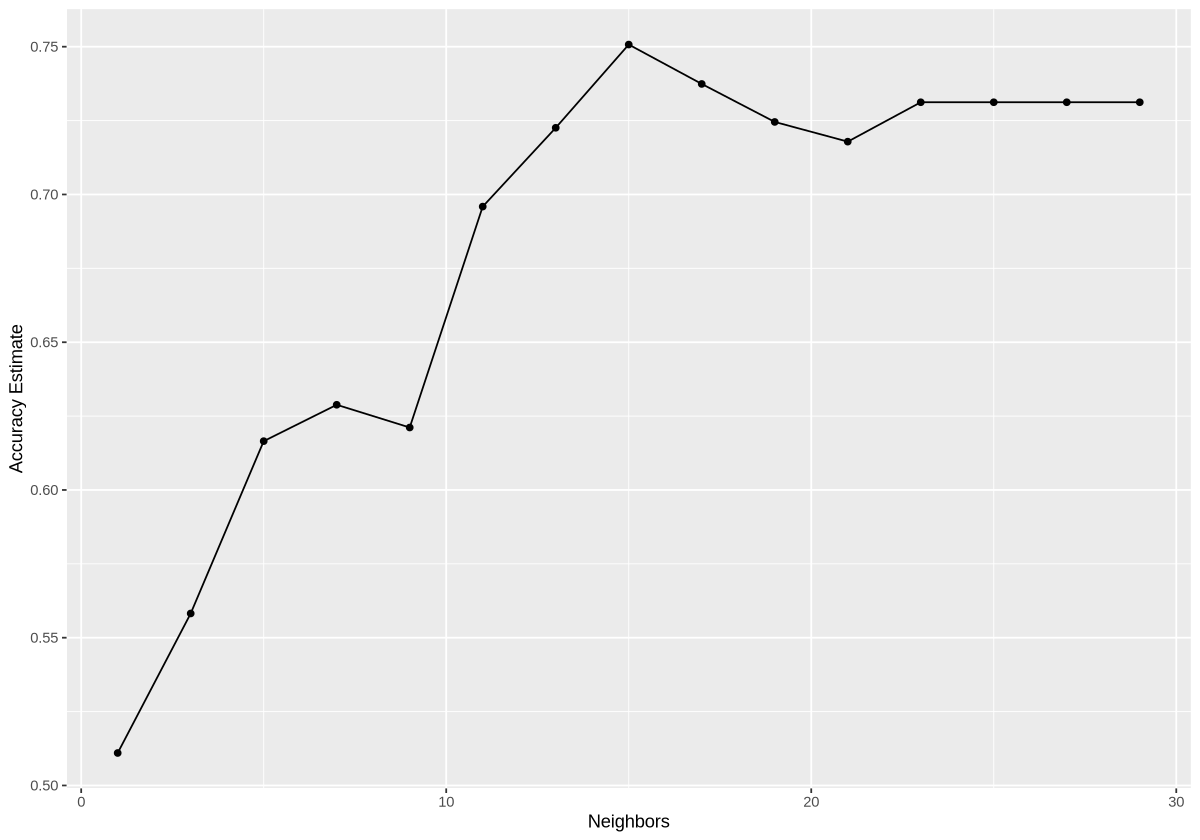

In [215]:
accuracies <- knn_results |> 
      filter(.metric == "accuracy")

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") 
accuracy_versus_k

Having found the best k value, we will now create our final classification model with that value as our k. 

In [216]:
knn_best_k <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit_final <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_best_k) |>
  fit(data = players_train)

knn_fit_final

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(15,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2413793
Best kernel: rectangular
Best k: 15

Using our final trained model, we will predict the subscription of players based on our testing dataset. 

In [207]:
players_test_predictions <- predict(knn_fit_final, players_test) |>
  bind_cols(players_test)
head(players_test_predictions)
tail(players_test_predictions)

.pred_class,subscribe,played_hours,age
<fct>,<fct>,<dbl>,<int>
TRUE,TRUE,0.1,21
TRUE,TRUE,0.0,19
TRUE,TRUE,1.6,23
TRUE,TRUE,0.2,22
FALSE,TRUE,0.3,58
TRUE,TRUE,0.6,28


.pred_class,subscribe,played_hours,age
<fct>,<fct>,<dbl>,<int>
TRUE,FALSE,0.2,17
TRUE,FALSE,1.7,17
TRUE,FALSE,0.0,17
TRUE,FALSE,0.3,22
FALSE,FALSE,0.0,57
TRUE,FALSE,2.3,17


After making our predictions, we will create a bar plot to compare the predicted values of the model and actual values of the dataset. 

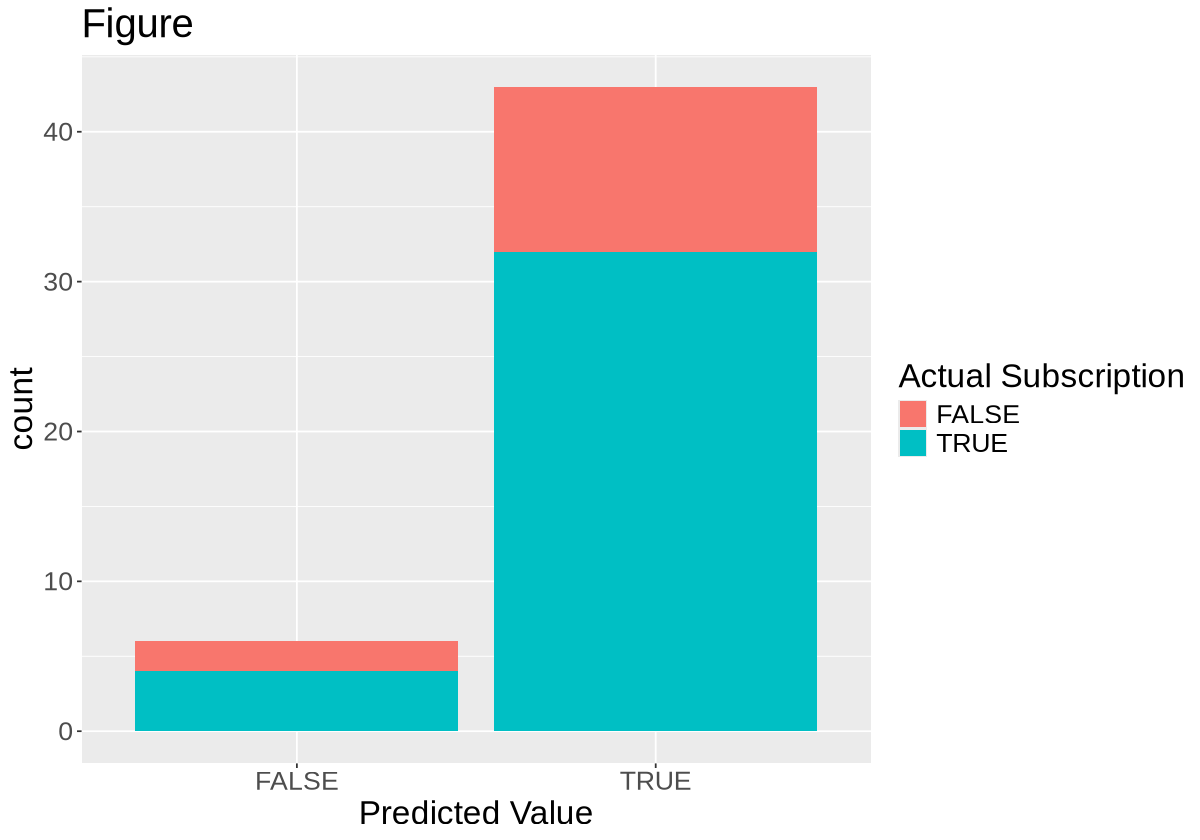

In [218]:
predictions_plot <- ggplot(players_test_predictions, aes(x = .pred_class, fill = subscribe)) + 
    geom_bar() + 
    labs(x = "Predicted Value", fill = "Actual Subscription") + 
    ggtitle("Figure") +
    theme(text = element_text(size = 20))
predictions_plot

We can also take a look at the confusion matrix in order to figure out the accuracy, precision, and recall of our model (which we can also find through code). 

In [219]:
player_accuracy <- players_test_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")
player_accuracy

player_precision <- players_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "first")
player_precision

player_recall <- players_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "first")
player_recall

player_conf <- players_test_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
player_conf

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6938776


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.3333333


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.1538462


          Truth
Prediction FALSE TRUE
     FALSE     2    4
     TRUE     11   32

The accuracy of our model is approximately 69.39%, the precision of our model is approximately 33.33%, and the recall of our model is approximately 15.38%. None of these are particularily high values, and they confirm that player subscription cannot be predicted well based on a player's age and amount of hours played. 